In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
from datetime import datetime

In [2]:
all_file=os.listdir('./')
file=[]
for each_file in all_file:
    try:
        if  each_file.split('.')[1]=='csv':
            file.append(each_file)
    except: continue
file

['54.csv',
 '41.csv',
 '7.csv',
 '43.csv',
 '57.csv',
 '5.csv',
 '56.csv',
 '4.csv',
 '42.csv',
 '46.csv',
 '0.csv',
 '52.csv',
 '1.csv',
 '53.csv',
 '47.csv',
 '51.csv',
 '3.csv',
 '45.csv',
 '44.csv',
 '50.csv',
 '2.csv',
 '23.csv',
 '22.csv',
 '36.csv',
 '20.csv',
 '34.csv',
 '35.csv',
 '25.csv',
 '31.csv',
 '19.csv',
 '18.csv',
 '30.csv',
 '24.csv',
 '32.csv',
 '27.csv',
 '33.csv',
 '16.csv',
 '17.csv',
 '15.csv',
 '14.csv',
 '10.csv',
 '39.csv',
 '12.csv',
 '49.csv',
 '9.csv',
 '8.csv',
 '58.csv',
 '59.csv']

In [3]:
df=None
for f in file:

    data=pd.read_csv(f)
    if df is None:
        df=data
    else:
        df=pd.concat([df,data])
# df=df.drop('Unnamed: 0',axis=1)
df

,date,recreational_activities,home_time,school_time,travel_time,orthers,date_in_week,cut_class,class_schedule,volunteer,location_names,level,shopping,working
0,01:04:2013,62099.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,55.0,Courtyard Marriott,NaN,NaN,NaN
1,01:05:2013,0.0,30000.0,32400.0,0.0,0.0,2.0,0.0,0.0,55.0,"0,0,0,0,Dartmouth College,Dartmouth College,Da...",NaN,NaN,NaN
2,02:04:2013,0.0,94186.0,0.0,4831.0,0.0,1.0,0.0,0.0,55.0,"Dartmouth College,McCulloch Hall,Dartmouth Col...",NaN,NaN,NaN
3,02:05:2013,0.0,70748.0,0.0,0.0,0.0,3.0,0.0,0.0,55.0,"Dartmouth College,Dartmouth College,Dartmouth ...",1.0,NaN,NaN
4,03:04:2013,0.0,54056.0,14414.0,0.0,0.0,2.0,0.0,0.0,55.0,"Dartmouth College,Dartmouth College,Sudikoff H...",NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62,30:03:2013,2308.0,83626.0,1268.0,0.0,1292.0,5.0,0.0,0.0,60.0,"Dartmouth College,Dartmouth College,Dartmouth ...",3.0,NaN,1347.0
63,30:04:2013,1200.0,23822.0,63801.0,0.0,0.0,1.0,0.0,0.0,60.0,"Dartmouth College,Berry Library,Dartmouth Coll...",3.0,NaN,0.0
64,30:05:2013,4801.0,60869.0,14396.0,0.0,0.0,3.0,0.0,0.0,60.0,"Dartmouth College,Class of 1953 Commons,Class ...",3.5,NaN,0.0
65,31:03:2013,7200.0,68390.0,13356.0,0.0,0.0,-1.0,0.0,0.0,60.0,"Dartmouth College,Sudikoff Hall,Sudikoff Hall,...",2.2,NaN,0.0


In [4]:
# df=df.drop('Unnamed: 0',axis=1)
df.describe()

,recreational_activities,home_time,school_time,travel_time,orthers,date_in_week,cut_class,class_schedule,volunteer,level,shopping,working
count,2461.000000,2.552000e+03,2.552000e+03,2552.000000,2529.000000,2552.000000,2552.000000,2552.000000,2552.000000,1148.000000,1493.000000,1677.000000
mean,4327.232426,5.818044e+04,2.173540e+04,5343.924765,4379.149071,2.057602,0.172022,3614.224138,30.219044,2.243502,678.091762,4176.082886
std,15598.561081,6.542489e+04,4.670326e+04,18636.377011,28323.188177,1.953851,0.377473,4373.164560,18.506216,1.218676,6721.532374,20174.173059
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,-1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,0.000000,1.710300e+04,2.399000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,13.000000,1.000000,0.000000,0.000000
50%,0.000000,5.520000e+04,8.402000e+03,0.000000,0.000000,2.000000,0.000000,0.000000,31.000000,2.000000,0.000000,0.000000
75%,3600.000000,7.680000e+04,2.400000e+04,1200.000000,0.000000,4.000000,0.000000,6900.000000,47.000000,3.000000,0.000000,0.000000
max,425628.000000,1.645748e+06,1.081434e+06,351816.000000,950627.000000,5.000000,1.000000,17100.000000,60.000000,5.000000,136800.000000,517676.000000


In [5]:
def offset(data):
    try:
        if float(data)>86400:
            return 0
        return data
    except:
        return data
def to_min(time):
    try:
        return int(time/60)
    except: return time
    
time_type='%d:%m:%Y'
week=[]
def transform_week(time):
        time=datetime.strptime(time,time_type)
        return datetime.strftime(time,'%W')
for date in df.date.values:
    week.append(transform_week(date))
df['week']=week
for col in [ 'home_time', 'school_time', 'travel_time',
            'recreational_activities', 'orthers','working', 'shopping']:
    df[col]=df[col].apply(lambda x: offset(x))
    df[col]=df[col].fillna(0)

for col in [ 'home_time', 'school_time', 'travel_time',
            'recreational_activities', 'orthers','working', 'shopping']:
    df[col]=df[col].apply(lambda x: to_min(x))
df['date_in_week']=df['date_in_week'].values+1
df['None_school_time']=1440-df.school_time-df.home_time
df

,date,recreational_activities,home_time,school_time,travel_time,orthers,date_in_week,cut_class,class_schedule,volunteer,location_names,level,shopping,working,week,None_school_time
0,01:04:2013,1034,0,0,0,0,1.0,0.0,0.0,55.0,Courtyard Marriott,NaN,0,0,13,1440
1,01:05:2013,0,500,540,0,0,3.0,0.0,0.0,55.0,"0,0,0,0,Dartmouth College,Dartmouth College,Da...",NaN,0,0,17,400
2,02:04:2013,0,0,0,80,0,2.0,0.0,0.0,55.0,"Dartmouth College,McCulloch Hall,Dartmouth Col...",NaN,0,0,13,1440
3,02:05:2013,0,1179,0,0,0,4.0,0.0,0.0,55.0,"Dartmouth College,Dartmouth College,Dartmouth ...",1.0,0,0,17,261
4,03:04:2013,0,900,240,0,0,3.0,0.0,0.0,55.0,"Dartmouth College,Dartmouth College,Sudikoff H...",NaN,0,0,13,300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62,30:03:2013,38,1393,21,0,21,6.0,0.0,0.0,60.0,"Dartmouth College,Dartmouth College,Dartmouth ...",3.0,0,22,12,26
63,30:04:2013,20,397,1063,0,0,2.0,0.0,0.0,60.0,"Dartmouth College,Berry Library,Dartmouth Coll...",3.0,0,0,17,-20
64,30:05:2013,80,1014,239,0,0,4.0,0.0,0.0,60.0,"Dartmouth College,Class of 1953 Commons,Class ...",3.5,0,0,21,187
65,31:03:2013,120,1139,222,0,0,0.0,0.0,0.0,60.0,"Dartmouth College,Sudikoff Hall,Sudikoff Hall,...",2.2,0,0,12,79


In [6]:
# from bioinfokit.analys import stat
# ANOVA=None
# for col in df.columns:
#     if col not in ['date','level','volunteer']:
#         res = stat()
#         res.anova_stat(df=df, res_var='level'
#                              , anova_model=f"level ~ C({col})")
# #         print(res.anova_summary.iloc[0,:])
#         if ANOVA is None:
#             ANOVA=res.anova_summary
#         else:
#             ANOVA=pd.concat([ANOVA,res.anova_summary])

In [7]:
# ANOVA=ANOVA.drop('Residual')

In [8]:
# ANOVA['PR(>F)']=ANOVA['PR(>F)']*100

In [9]:
# ANOVA['PR(>F)']=ANOVA['PR(>F)'].astype(int)
# ANOVA=ANOVA.rename(columns={'PR(>F)':'p_value(%)'})
# ANOVA

In [10]:
# import dataframe_image as dfi
# dfi.export(ANOVA ,'../ANOVA_table_final_data_no_filter.png')

In [11]:
def group_stress(data):
    if data<3:
        return 0
    if data >3:
        return 0
    return 1
df['level']=df['level'].apply(lambda x:group_stress(x)).astype('category')

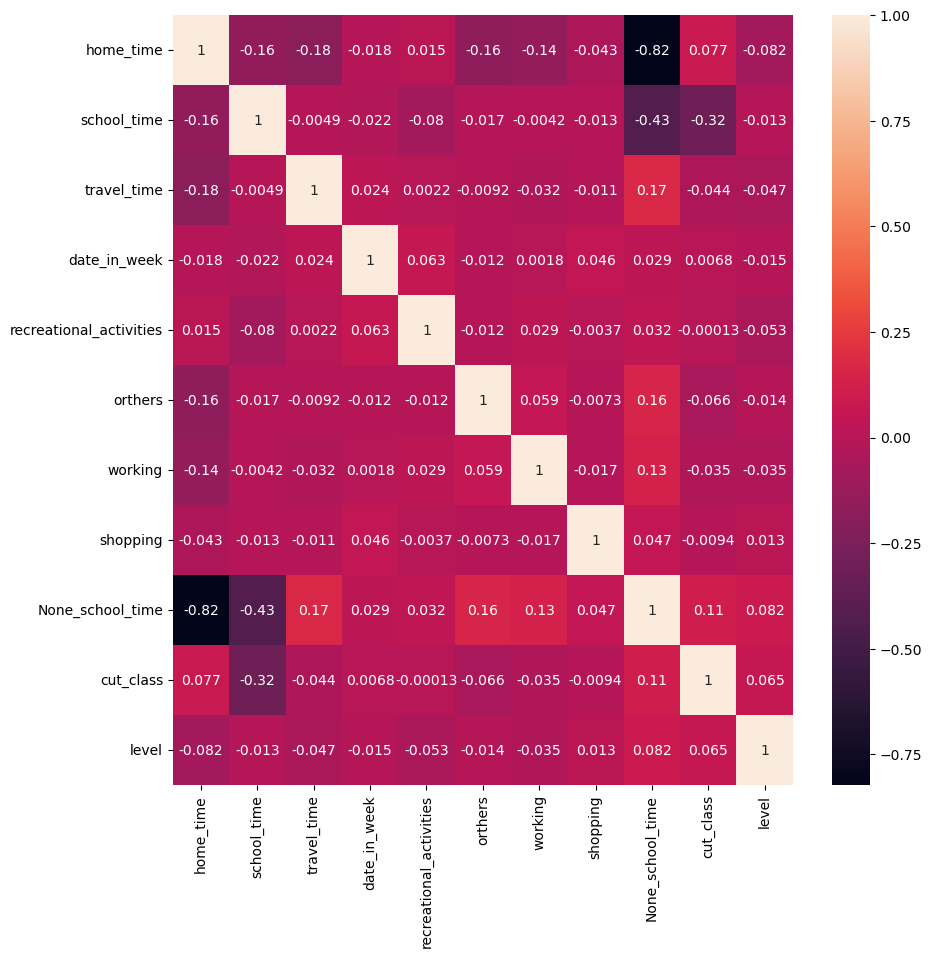

In [12]:
corr=df[[ 'home_time', 'school_time', 'travel_time', 'date_in_week',
        'recreational_activities', 'orthers',
       'working', 'shopping','None_school_time','cut_class','level']].corr()
ax,fig=plt.subplots(figsize=(10,10))
sns.heatmap(corr,annot=True)
plt.savefig('../image/corr.png')

/Users/khangphan/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/khangphan/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/khangphan/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/khangphan/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert in

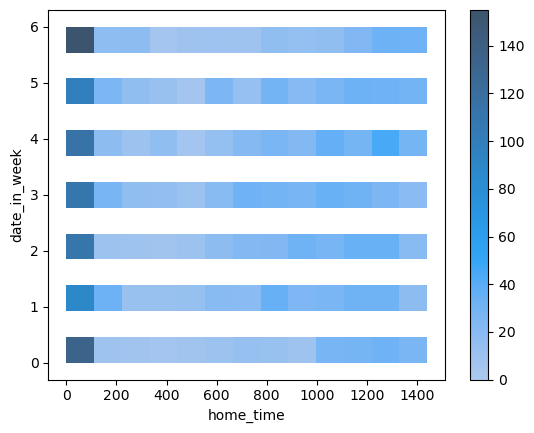

In [13]:
sns.histplot(df,x='home_time',y='date_in_week',cbar=True)
plt.savefig('../image/hometime vs day.png')

In [14]:
df

,date,recreational_activities,home_time,school_time,travel_time,orthers,date_in_week,cut_class,class_schedule,volunteer,location_names,level,shopping,working,week,None_school_time
0,01:04:2013,1034,0,0,0,0,1.0,0.0,0.0,55.0,Courtyard Marriott,1,0,0,13,1440
1,01:05:2013,0,500,540,0,0,3.0,0.0,0.0,55.0,"0,0,0,0,Dartmouth College,Dartmouth College,Da...",1,0,0,17,400
2,02:04:2013,0,0,0,80,0,2.0,0.0,0.0,55.0,"Dartmouth College,McCulloch Hall,Dartmouth Col...",1,0,0,13,1440
3,02:05:2013,0,1179,0,0,0,4.0,0.0,0.0,55.0,"Dartmouth College,Dartmouth College,Dartmouth ...",0,0,0,17,261
4,03:04:2013,0,900,240,0,0,3.0,0.0,0.0,55.0,"Dartmouth College,Dartmouth College,Sudikoff H...",1,0,0,13,300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62,30:03:2013,38,1393,21,0,21,6.0,0.0,0.0,60.0,"Dartmouth College,Dartmouth College,Dartmouth ...",1,0,22,12,26
63,30:04:2013,20,397,1063,0,0,2.0,0.0,0.0,60.0,"Dartmouth College,Berry Library,Dartmouth Coll...",1,0,0,17,-20
64,30:05:2013,80,1014,239,0,0,4.0,0.0,0.0,60.0,"Dartmouth College,Class of 1953 Commons,Class ...",0,0,0,21,187
65,31:03:2013,120,1139,222,0,0,0.0,0.0,0.0,60.0,"Dartmouth College,Sudikoff Hall,Sudikoff Hall,...",0,0,0,12,79


In [15]:
df=df.sort_values(['week','date'])
df=df.reset_index(drop=True)
# df=df.drop('date.1',axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2552 entries, 0 to 2551
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   date                     2552 non-null   object  
 1   recreational_activities  2552 non-null   int64   
 2   home_time                2552 non-null   int64   
 3   school_time              2552 non-null   int64   
 4   travel_time              2552 non-null   int64   
 5   orthers                  2552 non-null   int64   
 6   date_in_week             2552 non-null   float64 
 7   cut_class                2552 non-null   float64 
 8   class_schedule           2552 non-null   float64 
 9   volunteer                2552 non-null   float64 
 10  location_names           2552 non-null   object  
 11  level                    2552 non-null   category
 12  shopping                 2552 non-null   int64   
 13  working                  2552 non-null   int64   
 14  week    

/Users/khangphan/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/khangphan/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/khangphan/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/khangphan/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values t

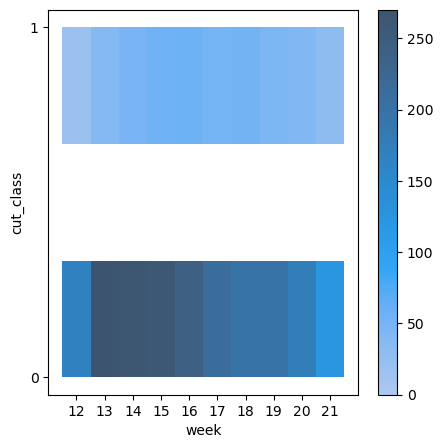

In [16]:
ax,fig=plt.subplots(figsize=(5,5))
sns.histplot(df,x='week',y='cut_class',cbar=True,bins=3)
plt.yticks([0,1])
plt.savefig('../image/cutclass vs week.png')

/Users/khangphan/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/khangphan/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/khangphan/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/khangphan/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype

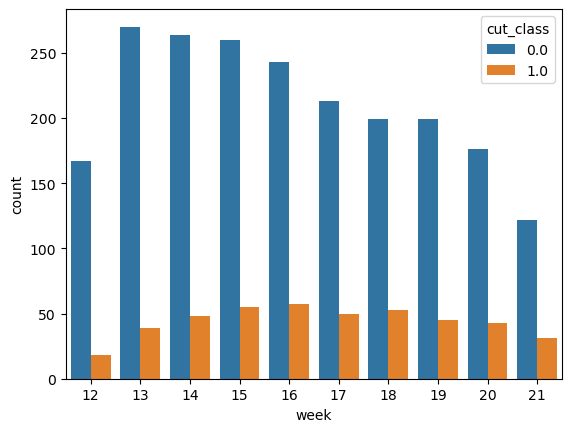

In [17]:
sns.countplot(df,x='week',hue='cut_class')
plt.savefig('../image/count cutclass vs week.png')

In [18]:
# print(df['level'].unique())
df_stress=df.iloc[:,1:]
# df_stress['level']=df_stress['level'].fillna(df_stress['level'].median())
# df_stress['level']=df_stress['level'].fillna(0)


/Users/khangphan/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/khangphan/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/khangphan/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/khangphan/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype

[1, 0]
Categories (2, int64): [0, 1]


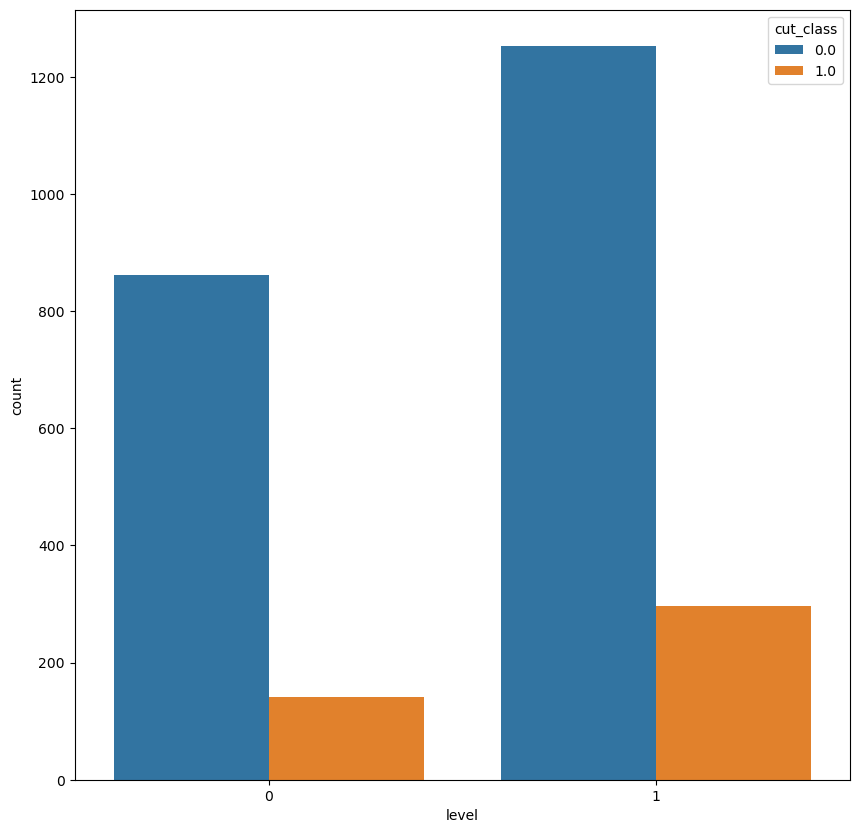

In [19]:
df_stress['level']=df_stress['level'].astype(int)
ax,fig=plt.subplots(figsize=(10,10))
sns.countplot(df_stress,x='level',hue='cut_class')
plt.xticks(rotation=0)
plt.savefig('../image/stress vs cutclass.png')
print(df['level'].unique())

In [20]:
df_stress

,recreational_activities,home_time,school_time,travel_time,orthers,date_in_week,cut_class,class_schedule,volunteer,location_names,level,shopping,working,week,None_school_time
0,0,59,60,0,0,3.0,0.0,0.0,55.0,"Class of 1978 Life Sciences Center,Dartmouth C...",1,0,0,12,1321
1,0,0,0,0,0,3.0,0.0,10500.0,42.0,Sudikoff Hall,1,0,0,12,1440
2,99,600,80,0,0,3.0,0.0,3900.0,8.0,"Morton Hall,Morton Hall,0,Class of 1978 Life S...",0,0,0,12,760
3,0,0,180,0,0,3.0,0.0,0.0,58.0,"Alpha Theta,Alpha Theta,Collis Student Center,...",0,0,619,12,1260
4,0,159,59,0,0,3.0,1.0,11700.0,6.0,"Class of 1978 Life Sciences Center,Class of 19...",0,0,0,12,1222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2547,0,0,0,0,0,5.0,1.0,9000.0,28.0,"Ripley Hall,Ripley Hall,Ripley Hall",1,0,0,21,1440
2548,200,0,0,0,0,5.0,1.0,6000.0,11.0,"Dartmouth College,Dartmouth College,Ripley Hal...",1,0,0,21,1440
2549,0,1150,0,10,160,5.0,1.0,3000.0,13.0,"0,0,0,0,0,0,School Street School,RE/MAX",1,0,0,21,290
2550,392,696,170,7,0,5.0,0.0,0.0,50.0,"Baker Memorial Library,Dartmouth College,Baker...",0,0,119,21,574


In [21]:
stress_cut_classes=df_stress[df_stress['cut_class']==1]['level']
stress_no_cut_classes=df_stress[df_stress['cut_class']==0]['level']

from scipy.stats import f_oneway
f_oneway(stress_no_cut_classes,stress_cut_classes)

F_onewayResult(statistic=10.791969773958876, pvalue=0.001033210080459873)

/Users/khangphan/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/khangphan/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/khangphan/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/khangphan/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype

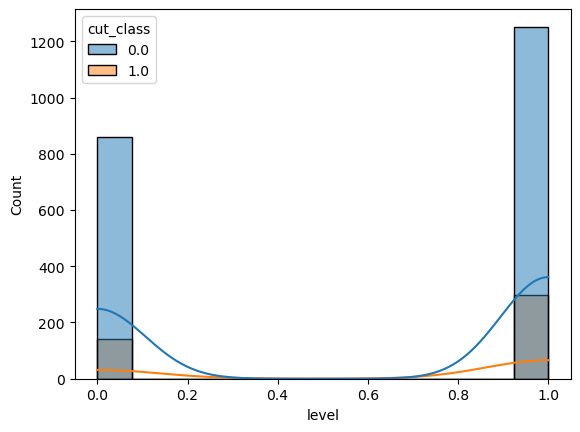

In [22]:
sns.histplot(df_stress,x='level',hue='cut_class',kde=True)
plt.savefig('../image/stress by cut class.png')

In [23]:
no_cut_class_data=df_stress[df_stress['cut_class']==0]
cut_class_data=df_stress[df_stress['cut_class']==1]
no_cut_class_data=no_cut_class_data['level'].value_counts().to_frame()
no_cut_class_data['count']=no_cut_class_data['count']/(no_cut_class_data['count'].sum())
no_cut_class_data
cut_class_data=cut_class_data['level'].value_counts().to_frame()
cut_class_data['count']=cut_class_data['count']/cut_class_data['count'].sum()
cut_class_data

,count
level,
1,0.676538
0,0.323462


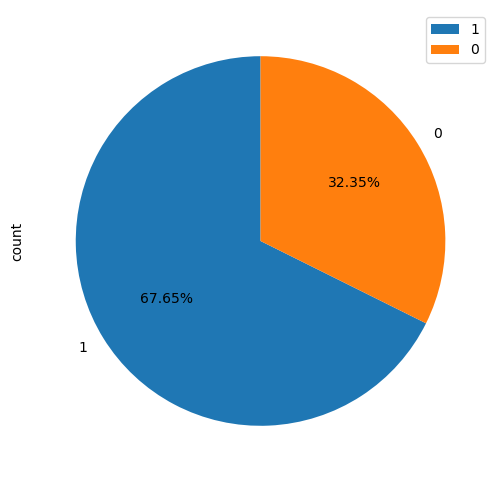

In [24]:
cut_class_data.plot.pie(subplots=True, figsize=(11, 6),startangle=90,autopct='%1.2f%%')
plt.savefig('../image/stress ratio cut class.png')

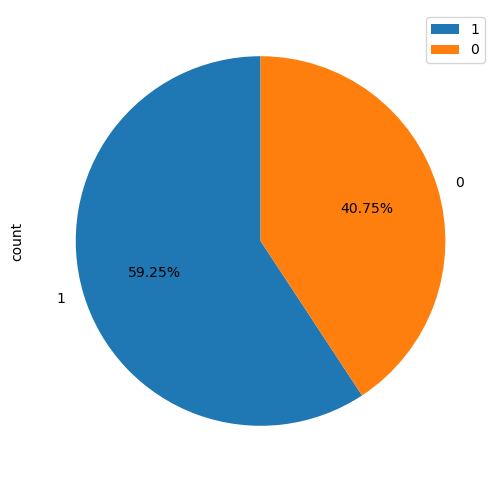

In [25]:
no_cut_class_data.plot.pie(subplots=True, figsize=(11, 6),startangle=90,autopct='%1.2f%%')
plt.savefig('../image/stress ratio no cut class.png')

/Users/khangphan/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/khangphan/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/khangphan/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/khangphan/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype

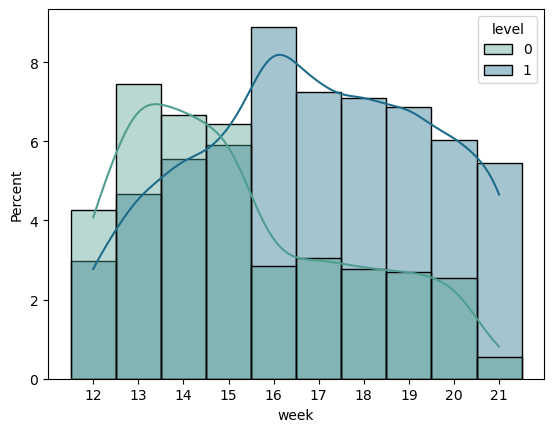

In [26]:
sns.histplot(df_stress,x='week',hue='level',kde=True,palette='crest',bins=10,stat='percent',alpha=0.4)
plt.savefig('../image/stress by week.png')

/Users/khangphan/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/khangphan/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/khangphan/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/khangphan/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype

<Axes: xlabel='week', ylabel='Percent'>

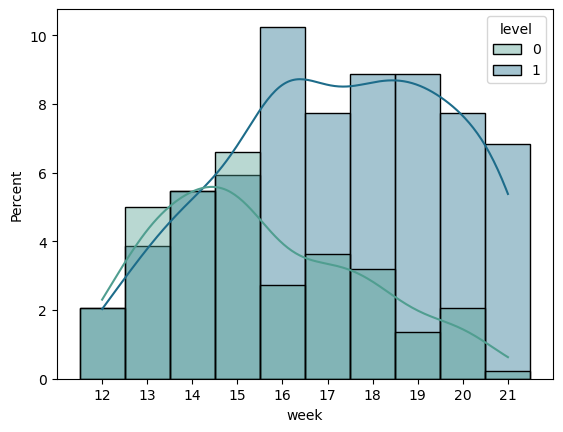

In [27]:
sns.histplot(df_stress[df_stress['cut_class']==1],x='week',hue='level',kde=True,palette='crest',bins=10,stat='percent',alpha=0.4)

/Users/khangphan/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/khangphan/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/khangphan/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/khangphan/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype

<Axes: xlabel='week', ylabel='Percent'>

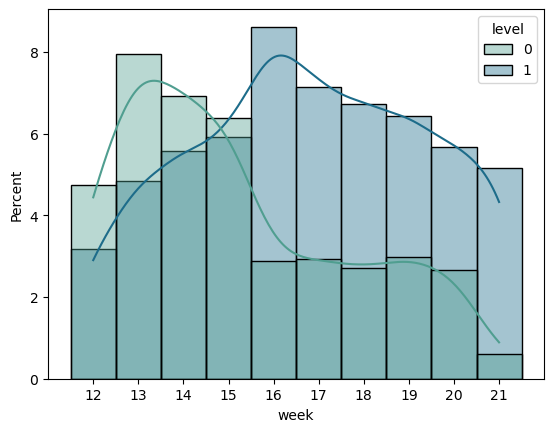

In [28]:
sns.histplot(df_stress[df_stress['cut_class']==0],x='week',hue='level',kde=True,bins=10,palette='crest',stat='percent',alpha=0.4)

In [29]:
df_stress_fix=df_stress
df_stress_fix['school_time']=(df_stress_fix['school_time']/60).astype(int)



/Users/khangphan/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/khangphan/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/khangphan/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/khangphan/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert in

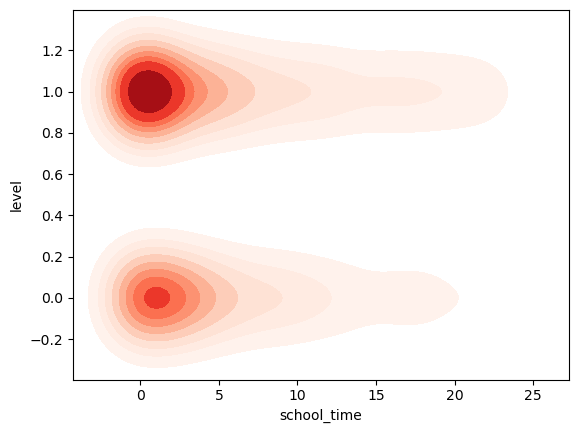

In [30]:
sns.kdeplot(df_stress_fix,x='school_time',y='level',cmap='Reds',fill=True)
plt.savefig('../image/stress by school time.png')

In [31]:
df_stress_fix['None_school_time']=(df_stress_fix['None_school_time']/60).astype(int)

/Users/khangphan/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/khangphan/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/khangphan/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/khangphan/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert in

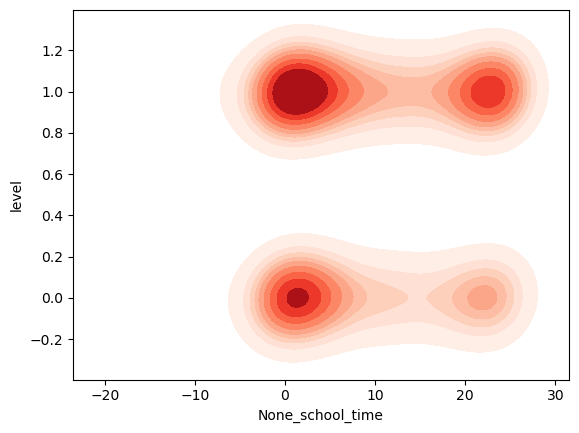

In [32]:
sns.kdeplot(df_stress_fix,x='None_school_time',y='level',cmap='Reds',fill=True)
plt.savefig('../image/stress by none school time.png')

In [33]:
df.info()
df_stress['week']=df_stress['week'].astype(int)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2552 entries, 0 to 2551
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   date                     2552 non-null   object  
 1   recreational_activities  2552 non-null   int64   
 2   home_time                2552 non-null   int64   
 3   school_time              2552 non-null   int64   
 4   travel_time              2552 non-null   int64   
 5   orthers                  2552 non-null   int64   
 6   date_in_week             2552 non-null   float64 
 7   cut_class                2552 non-null   float64 
 8   class_schedule           2552 non-null   float64 
 9   volunteer                2552 non-null   float64 
 10  location_names           2552 non-null   object  
 11  level                    2552 non-null   category
 12  shopping                 2552 non-null   int64   
 13  working                  2552 non-null   int64   
 14  week    

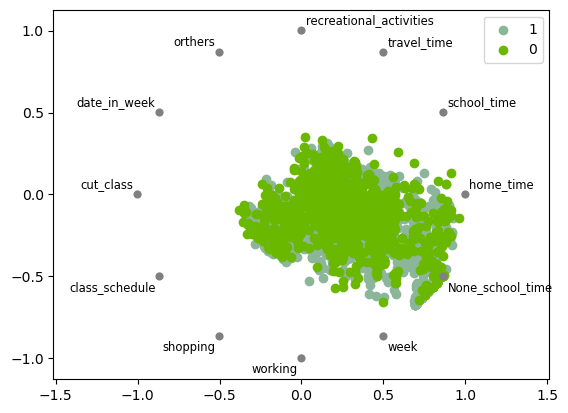

In [34]:
pd.plotting.radviz(df_stress[[ 'home_time', 'school_time', 'travel_time',
       'recreational_activities', 'orthers', 'date_in_week', 'cut_class',
       'class_schedule', 'level', 'shopping', 'working', 'week',
       'None_school_time']],'level')
plt.savefig('../image/radvix.png')

/Users/khangphan/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/khangphan/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/khangphan/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='level', ylabel='count'>

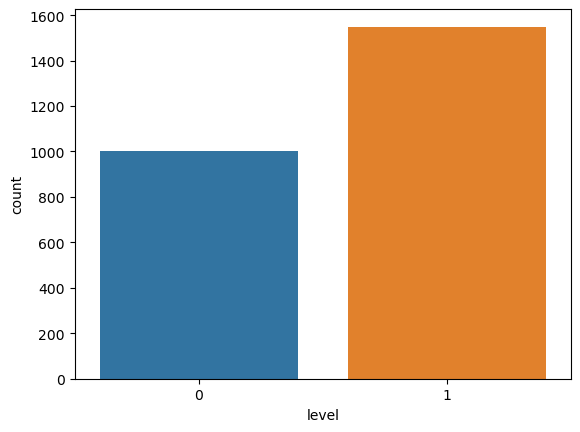

In [35]:
sns.countplot(df_stress,x='level')

In [36]:
df.describe()

,recreational_activities,home_time,school_time,travel_time,orthers,date_in_week,cut_class,class_schedule,volunteer,shopping,working,None_school_time
count,2552.000000,2552.000000,2552.000000,2552.000000,2552.000000,2552.000000,2552.000000,2552.000000,2552.000000,2552.000000,2552.000000,2552.000000
mean,56.042712,608.898903,255.063871,67.865987,42.610110,3.057602,0.172022,3614.224138,30.219044,4.461599,34.061129,576.037226
std,132.738721,510.742288,321.594230,207.062653,167.593396,1.953851,0.377473,4373.164560,18.506216,58.042754,142.124142,558.882320
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,-1019.000000
25%,0.000000,20.000000,20.000000,0.000000,0.000000,1.000000,0.000000,0.000000,13.000000,0.000000,0.000000,80.750000
50%,0.000000,660.000000,129.000000,0.000000,0.000000,3.000000,0.000000,0.000000,31.000000,0.000000,0.000000,370.500000
75%,59.000000,1100.000000,354.000000,19.000000,0.000000,5.000000,0.000000,6900.000000,47.000000,0.000000,0.000000,1180.000000
max,1320.000000,1440.000000,1439.000000,1422.000000,1439.000000,6.000000,1.000000,17100.000000,60.000000,1380.000000,1402.000000,1440.000000


/Users/khangphan/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/khangphan/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/khangphan/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/khangphan/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype

array([  60,    0,   80,  180,   59,   79,  300,  220,  931, 1321,  159,
       1125,   20,  119,  720,   39,   51,  199,  158,  160,  599,  480,
         99,  179,  260,  120, 1080, 1169,  259,  540, 1416,  339, 1060,
        140,  320,  661,  360,  400, 1140,  139,  380,  600,  940,   40,
        240,  440, 1379,  779,  544,  219,  201,  560, 1360,  299,  539,
        200,  819,   54,  379,  100, 1413,  250,   19, 1240,   21,  401,
       1000,  820,  222,  280,  914,  611,  980,  279, 1219,  780,  580,
        740,  760,  520,  660,  680,  185, 1160, 1079,  230,  359,  500,
        620,  624,  298, 1120,  340,  141,   17,  138,  451,  640,  860,
        439, 1020,   94,  734,  960, 1100, 1220,  739,  831,  420,  218,
       1096, 1180,  221, 1300,  460, 1400, 1131,  419, 1287,  999,  404,
        478,  920,  835,  561,   78,  438,  900,  499,  605, 1280,  101,
       1099, 1433,  479,   58,  639,  208,  373,  398,  750,  719, 1260,
        803, 1319,   98,  333,  121,  840,  880,  9

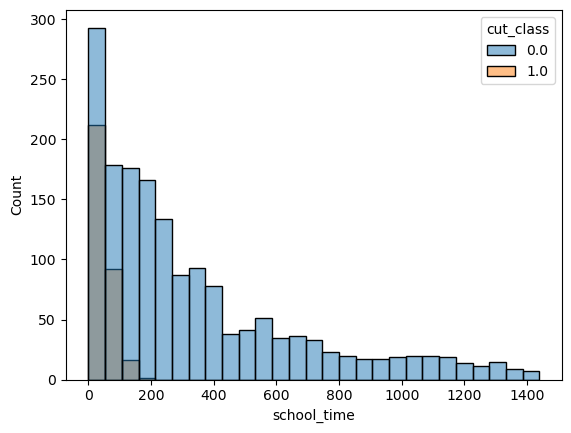

In [37]:
df=df.reset_index(drop=True)
df_new=df.drop(df[df['home_time']==0].index)

sns.histplot(df_new,x='school_time',hue='cut_class')

df_new.describe()
df['school_time'].unique()


In [38]:
df.school_time.value_counts

<bound method IndexOpsMixin.value_counts of 0        60
1         0
2        80
3       180
4        59
       ... 
2547      0
2548      0
2549      0
2550    170
2551    319
Name: school_time, Length: 2552, dtype: int64>

In [39]:
df.columns

Index(['date', 'recreational_activities', 'home_time', 'school_time',
       'travel_time', 'orthers', 'date_in_week', 'cut_class', 'class_schedule',
       'volunteer', 'location_names', 'level', 'shopping', 'working', 'week',
       'None_school_time'],
      dtype='object')

In [40]:
y=df['level']
y.unique()

[1, 0]
Categories (2, int64): [0, 1]

In [41]:

X=df[[ 'home_time', 'school_time', 'travel_time',
       'recreational_activities', 'orthers', 'date_in_week', 'cut_class',
       'class_schedule' ,  'shopping', 'working',
       'week', 'None_school_time']]
y=df['level']
# y=y.fillna(y.median())
y=y.astype(int)
# y=y.apply(lambda x:group_stress(x))
y.unique()

array([1, 0])

In [42]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2552 entries, 0 to 2551
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   home_time                2552 non-null   int64  
 1   school_time              2552 non-null   int64  
 2   travel_time              2552 non-null   int64  
 3   recreational_activities  2552 non-null   int64  
 4   orthers                  2552 non-null   int64  
 5   date_in_week             2552 non-null   float64
 6   cut_class                2552 non-null   float64
 7   class_schedule           2552 non-null   float64
 8   shopping                 2552 non-null   int64  
 9   working                  2552 non-null   int64  
 10  week                     2552 non-null   object 
 11  None_school_time         2552 non-null   int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 239.4+ KB


In [43]:
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 2552 entries, 0 to 2551
Series name: level
Non-Null Count  Dtype
--------------  -----
2552 non-null   int64
dtypes: int64(1)
memory usage: 20.1 KB


In [44]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
scaler = StandardScaler()
X=X.astype(int)
X_train, X_vad, y_train, y_vad = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_ML, X_vad_ML, y_train_ML, y_vad_ML= X_train, X_vad, y_train, y_vad

# X_train = scaler.fit_transform(X_train)

# X_vad = scaler.fit_transform(X_vad)
X.shape


(2552, 12)

In [45]:
y.unique()

array([1, 0])

In [46]:
y.describe()

count    2552.000000
mean        0.606975
std         0.488518
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: level, dtype: float64

In [47]:
from imblearn.over_sampling import ADASYN
ada = ADASYN(random_state=42)
X_ada, y_ada = ada.fit_resample(X, y)
X_train_ada, X_vad_ada, y_train_ada, y_vad_ada = train_test_split(X_ada, y_ada, test_size=0.2, random_state=42)

In [48]:
from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.naive_bayes import GaussianNB #Naive bayes
from sklearn import metrics #accuracy measure
from sklearn.linear_model import LogisticRegression #logistic regression

Accuracy for RF is  0.7413249211356467
              precision    recall  f1-score   support

           0       0.77      0.76      0.77       353
           1       0.70      0.72      0.71       281

    accuracy                           0.74       634
   macro avg       0.74      0.74      0.74       634
weighted avg       0.74      0.74      0.74       634



<Axes: >

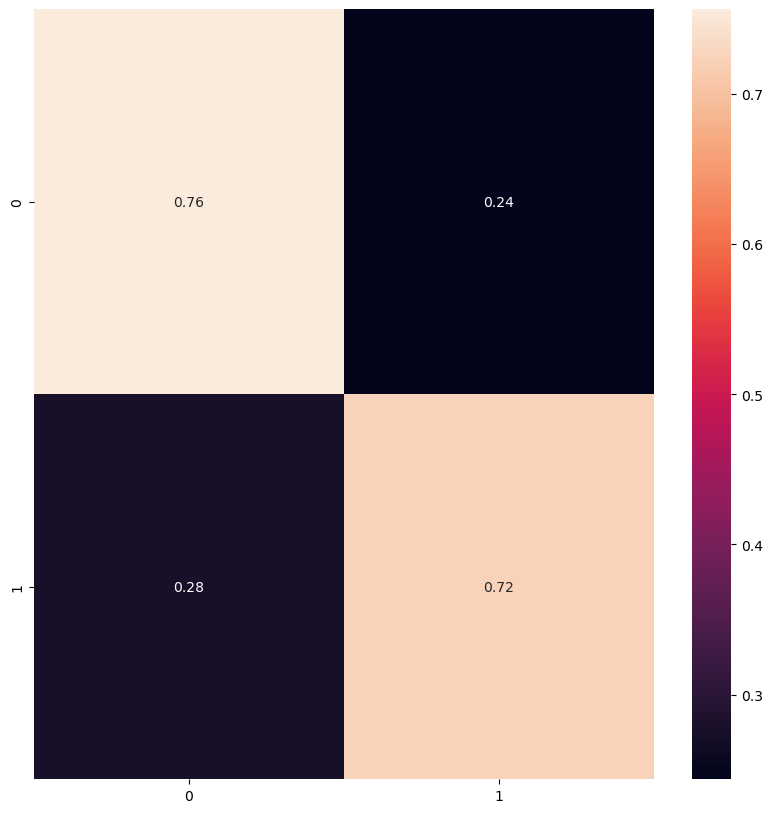

In [49]:
model_ada=RandomForestClassifier(random_state=10)
model_ada.fit(X_train_ada,y_train_ada)
prediction1=model_ada.predict(X_vad_ada)
print('Accuracy for RF is ',metrics.accuracy_score(prediction1,y_vad_ada))
ax,fig=plt.subplots(figsize=(10,10))
conf=metrics.confusion_matrix(prediction1,y_vad_ada, normalize='true')
print(metrics.classification_report(prediction1,y_vad_ada))
sns.heatmap(conf,annot=True)

In [50]:
from imblearn.combine import SMOTEENN
# oversampling the train dataset using SMOTE + ENN
smenn = SMOTEENN()
X_smoteenn, y_smoteenn = smenn.fit_resample(X,y)
X_train_smoteenn, X_vad_smoteenn, y_train_smoteenn, y_vad_smoteenn = train_test_split(X_smoteenn, y_smoteenn, test_size=0.2, random_state=42)

Accuracy for RF is  0.8655913978494624
              precision    recall  f1-score   support

           0       0.91      0.87      0.89       114
           1       0.81      0.86      0.83        72

    accuracy                           0.87       186
   macro avg       0.86      0.86      0.86       186
weighted avg       0.87      0.87      0.87       186



<Axes: >

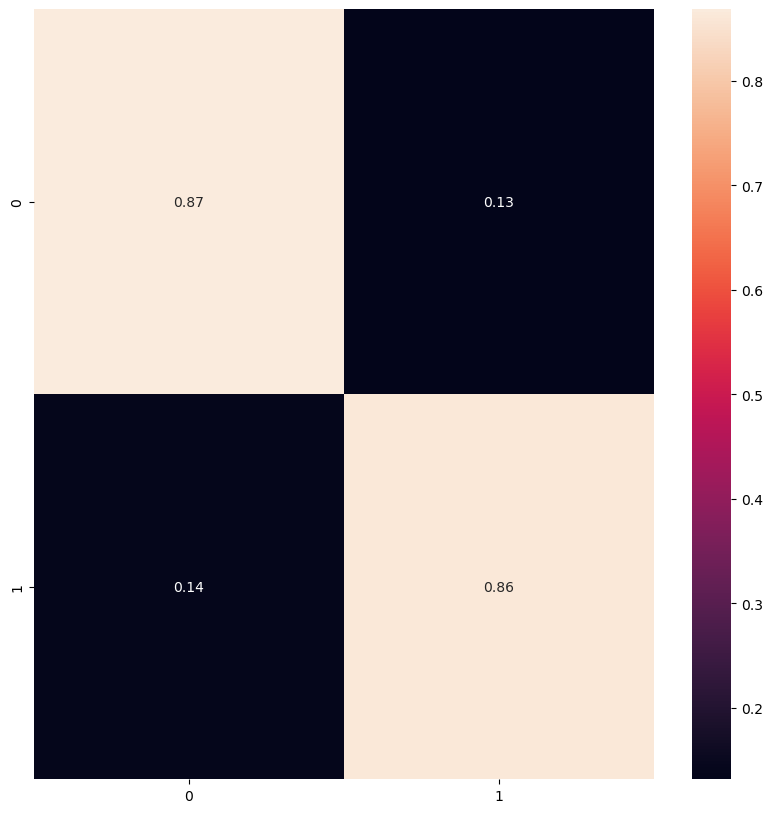

In [51]:
model_smoteenn=RandomForestClassifier(random_state=10)
model_smoteenn.fit(X_train_smoteenn,y_train_smoteenn)
prediction1=model_smoteenn.predict(X_vad_smoteenn)
print('Accuracy for RF is ',metrics.accuracy_score(prediction1,y_vad_smoteenn))
ax,fig=plt.subplots(figsize=(10,10))
conf=metrics.confusion_matrix(prediction1,y_vad_smoteenn, normalize='true')
print(metrics.classification_report(prediction1,y_vad_smoteenn))
sns.heatmap(conf,annot=True)

Accuracy for RF is  0.6986301369863014
              precision    recall  f1-score   support

           0       0.69      0.61      0.65       233
           1       0.70      0.77      0.74       278

    accuracy                           0.70       511
   macro avg       0.70      0.69      0.69       511
weighted avg       0.70      0.70      0.70       511



<Axes: >

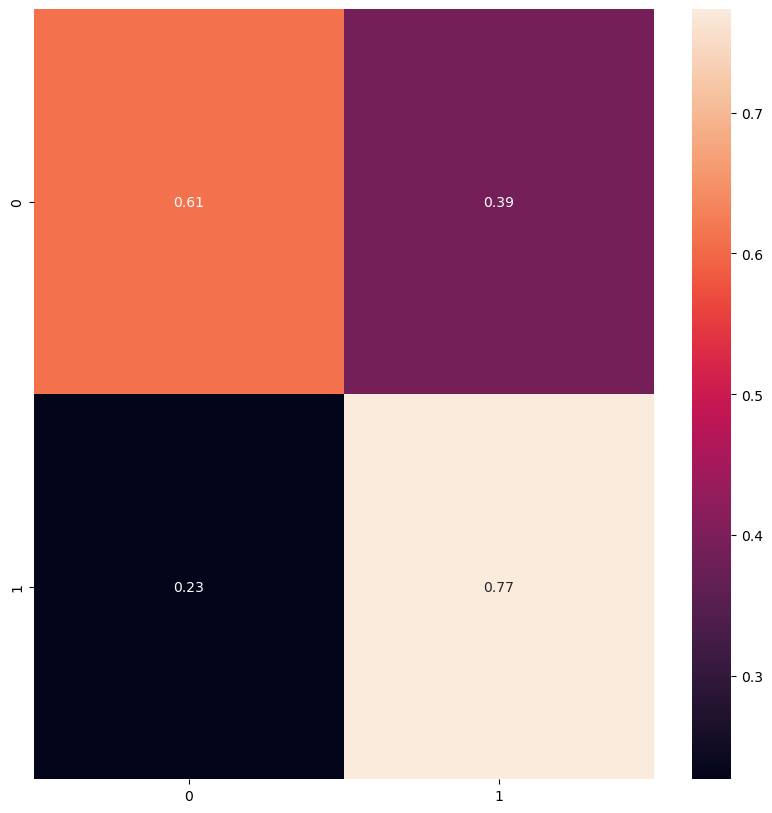

In [52]:
prediction1=model_smoteenn.predict(X_vad)
print('Accuracy for RF is ',metrics.accuracy_score(prediction1,y_vad))
ax,fig=plt.subplots(figsize=(10,10))
conf=metrics.confusion_matrix(prediction1,y_vad, normalize='true')
print(metrics.classification_report(prediction1,y_vad))
sns.heatmap(conf,annot=True)

In [53]:
from imblearn.combine import SMOTETomek
# oversampling the train dataset using SMOTE + ENN
smtomek = SMOTETomek()
X_smotetomek, y_smotetomek = smtomek.fit_resample(X,y)
X_train_smotetomek, X_vad_smotetomek, y_train_smotetomek, y_vad_smotetomek = train_test_split(X_smotetomek, y_smotetomek, test_size=0.2, random_state=42)

Accuracy for RF is  0.7226415094339622
              precision    recall  f1-score   support

           0       0.75      0.73      0.74       284
           1       0.70      0.72      0.71       246

    accuracy                           0.72       530
   macro avg       0.72      0.72      0.72       530
weighted avg       0.72      0.72      0.72       530



<Axes: >

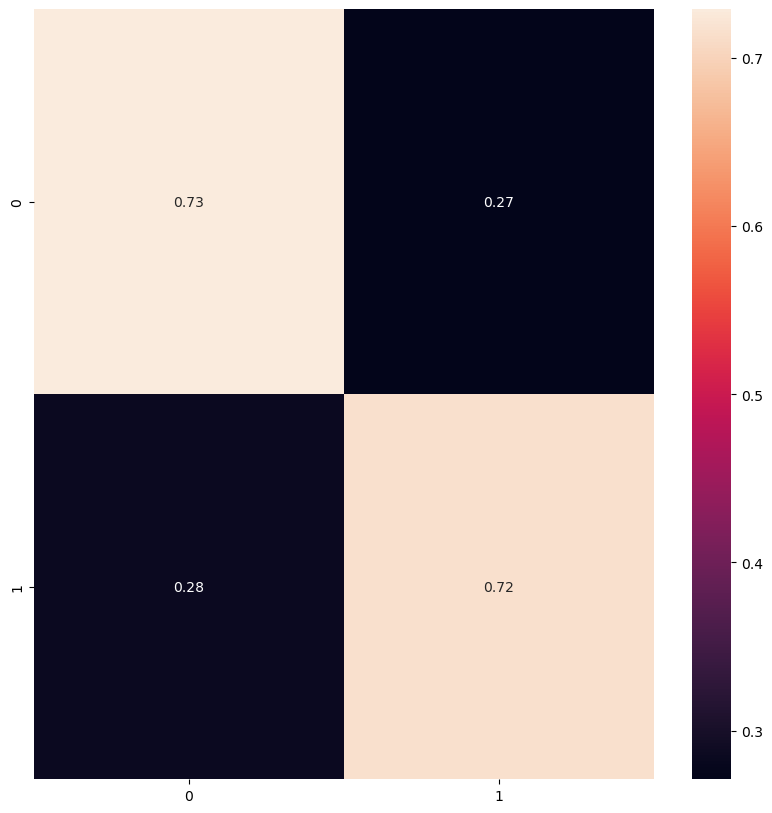

In [54]:
model_smotetomek=RandomForestClassifier(random_state=10)
model_smotetomek.fit(X_train_smotetomek,y_train_smotetomek)
prediction1=model_smotetomek.predict(X_vad_smotetomek)
print('Accuracy for RF is ',metrics.accuracy_score(prediction1,y_vad_smotetomek))
ax,fig=plt.subplots(figsize=(10,10))
conf=metrics.confusion_matrix(prediction1,y_vad_smotetomek, normalize='true')
print(metrics.classification_report(prediction1,y_vad_smotetomek))
sns.heatmap(conf,annot=True)

In [55]:
from imblearn.over_sampling import SMOTE
# oversampling the train dataset using SMOTE + ENN
sm = SMOTE()
X_smote, y_smote = sm.fit_resample(X,y)
X_train_smote, X_vad_smote, y_train_smote, y_vad_smote = train_test_split(X_smote, y_smote, test_size=0.2
                                                                          , random_state=10)

Accuracy for RF is  0.7129032258064516
              precision    recall  f1-score   support

           0       0.75      0.69      0.72       328
           1       0.68      0.74      0.71       292

    accuracy                           0.71       620
   macro avg       0.71      0.71      0.71       620
weighted avg       0.72      0.71      0.71       620



<Axes: >

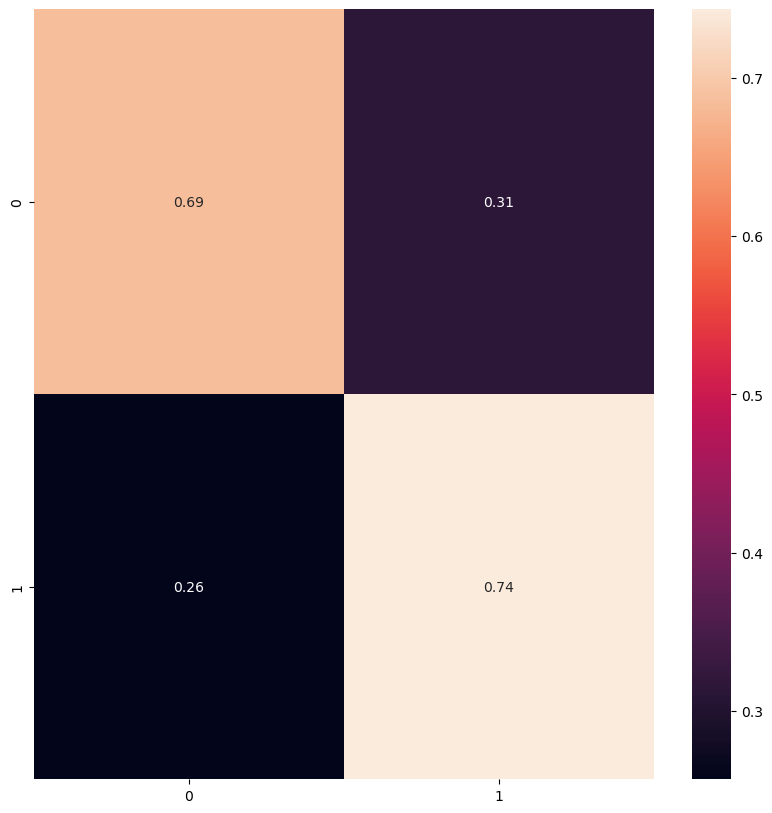

In [56]:
model_smote=RandomForestClassifier(random_state=10)
model_smote.fit(X_train_smote,y_train_smote)
prediction1=model_smote.predict(X_vad_smote)
print('Accuracy for RF is ',metrics.accuracy_score(prediction1,y_vad_smote))
ax,fig=plt.subplots(figsize=(10,10))
conf=metrics.confusion_matrix(prediction1,y_vad_smote, normalize='true')
print(metrics.classification_report(prediction1,y_vad_smote))
sns.heatmap(conf,annot=True)

In [57]:
# from xgboost import XGBClassifier#XGBcalssifier
# seed=200
# model=XGBClassifier (use_label_encoder=False, eval_metric='logloss', random_state=seed)
# model.fit(X_train,y_train)
# prediction1=model.predict(X_vad)
# print('Accuracy for XBG is ',metrics.accuracy_score(prediction1,y_vad))

In [58]:
data_smote=pd.concat([X_smoteenn, y_smoteenn],axis=1)
data_smote.level.value_counts()

level
0    514
1    412
Name: count, dtype: int64

In [59]:

df.dropna().level.value_counts()

level
1    1549
0    1003
Name: count, dtype: int64

In [60]:
data_ada=pd.concat([X_ada, y_ada],axis=1)
data_ada.level.value_counts()

level
0    1618
1    1549
Name: count, dtype: int64

Accuracy for RF is  0.6418786692759295
              precision    recall  f1-score   support

           0       0.44      0.57      0.50       158
           1       0.78      0.67      0.72       353

    accuracy                           0.64       511
   macro avg       0.61      0.62      0.61       511
weighted avg       0.67      0.64      0.65       511



<Axes: >

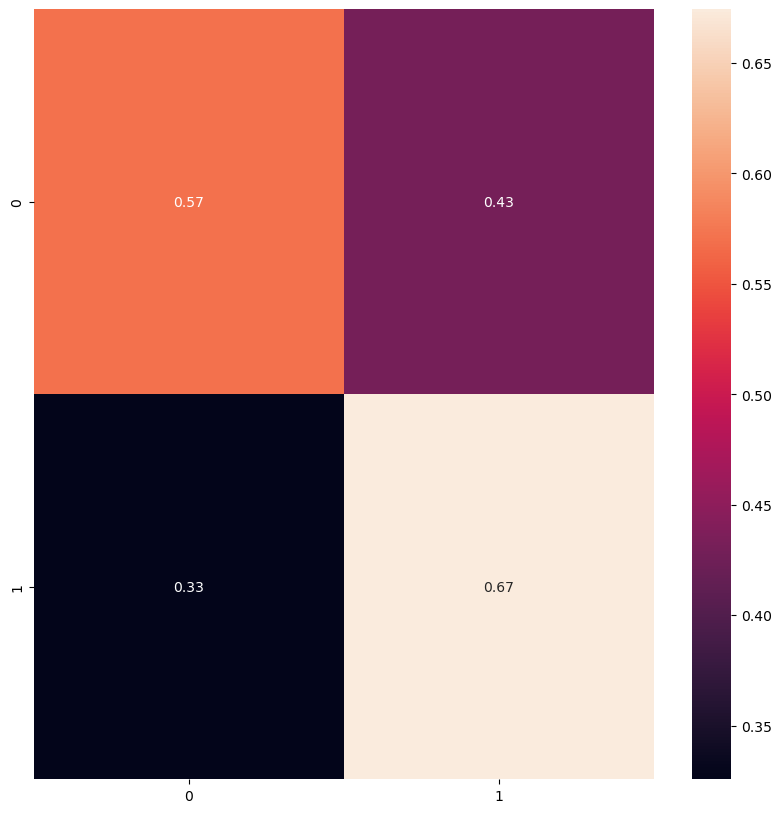

In [61]:
model=RandomForestClassifier(random_state=10)
model.fit(X_train,y_train)
prediction1=model.predict(X_vad)
print('Accuracy for RF is ',metrics.accuracy_score(prediction1,y_vad))
ax,fig=plt.subplots(figsize=(10,10))
conf=metrics.confusion_matrix(prediction1,y_vad, normalize='true')
print(metrics.classification_report(prediction1,y_vad))
sns.heatmap(conf,annot=True)

In [62]:
from sklearn.model_selection import KFold #for K-fold cross validation
from sklearn.model_selection import cross_val_score #score evaluation
from sklearn.model_selection import cross_val_predict #prediction
from sklearn import svm #support vector Machine
from xgboost import XGBClassifier#XGBcalssifier
from sklearn.neighbors import KNeighborsClassifier #KNN
seed=200
kfold = KFold(10, shuffle=True, random_state=seed) # k=10, split the data into 10 equal parts

cv_mean=[]
accuracy=[]
std=[]
classifier=[]
models=[svm.SVC(),KNeighborsClassifier(),RandomForestClassifier(random_state=seed),XGBClassifier ( eval_metric='logloss', random_state=seed)]
for model in models:
    model_name = model.__class__.__name__
    if model_name not in(classifier):
        classifier.append(model_name)
    cv_result = cross_val_score(model,X_smoteenn, y_smoteenn, cv = kfold)
    
    cv_mean.append(round(cv_result.mean(),2))
    std.append(round(cv_result.std(),2))
    accuracy.append(cv_result)
    print(model)
new_models_dataframe=pd.DataFrame({'ML model':classifier,'accuracy_score':cv_mean,'std':std})
new_models_dataframe=new_models_dataframe.set_index('ML model')
new_models_dataframe

SVC()
KNeighborsClassifier()
RandomForestClassifier(random_state=200)


/Users/khangphan/anaconda3/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/khangphan/anaconda3/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/Users/khangphan/anaconda3/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/Users/khangphan/anaconda3/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or

/Users/khangphan/anaconda3/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/khangphan/anaconda3/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/Users/khangphan/anaconda3/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/Users/khangphan/anaconda3/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, predictor=None, random_state=200, ...)


/Users/khangphan/anaconda3/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/khangphan/anaconda3/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/Users/khangphan/anaconda3/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/Users/khangphan/anaconda3/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or

,accuracy_score,std
ML model,,
SVC,0.70,0.06
KNeighborsClassifier,0.88,0.04
RandomForestClassifier,0.86,0.04
XGBClassifier,0.88,0.03


/Users/khangphan/anaconda3/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/khangphan/anaconda3/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/Users/khangphan/anaconda3/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/Users/khangphan/anaconda3/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or

/Users/khangphan/anaconda3/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/khangphan/anaconda3/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/Users/khangphan/anaconda3/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/Users/khangphan/anaconda3/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or

/Users/khangphan/anaconda3/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/khangphan/anaconda3/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/Users/khangphan/anaconda3/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/Users/khangphan/anaconda3/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or

(array([0, 1, 2, 3]),
 [Text(0, 0, 'SVC'),
  Text(1, 0, 'KNeighborsClassifier'),
  Text(2, 0, 'RandomForestClassifier'),
  Text(3, 0, 'XGBClassifier')])

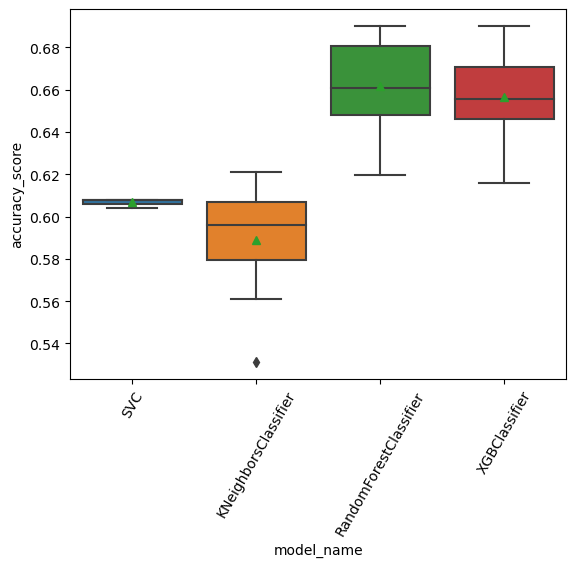

In [63]:
from sklearn.model_selection import StratifiedKFold #for K-fold cross validation
entries=[]
for model in models:
    model_name = model.__class__.__name__
    kfold = StratifiedKFold(10, shuffle=True, random_state=seed)
    scores = cross_val_score(model, X,y, cv=kfold)
    for fold_idx, score in enumerate(scores):
        entries.append([model_name, fold_idx, score])
cv_df = pd.DataFrame(entries, columns= [ 'model_name','fold id','accuracy_score' ])
sns.boxplot(cv_df,x='model_name',y='accuracy_score',showmeans=True)
plt.xticks(rotation=60)

/Users/khangphan/anaconda3/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/khangphan/anaconda3/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/Users/khangphan/anaconda3/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/Users/khangphan/anaconda3/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or

/Users/khangphan/anaconda3/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/khangphan/anaconda3/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/Users/khangphan/anaconda3/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/Users/khangphan/anaconda3/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or

/Users/khangphan/anaconda3/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/khangphan/anaconda3/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/Users/khangphan/anaconda3/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/Users/khangphan/anaconda3/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'SVC'),
  Text(1, 0, 'KNeighborsClassifier'),
  Text(2, 0, 'RandomForestClassifier'),
  Text(3, 0, 'XGBClassifier'),
  Text(4, 0, 'SVC smoteenn'),
  Text(5, 0, 'KNeighborsClassifier smoteenn'),
  Text(6, 0, 'RandomForestClassifier smoteenn'),
  Text(7, 0, 'XGBClassifier smoteenn')])

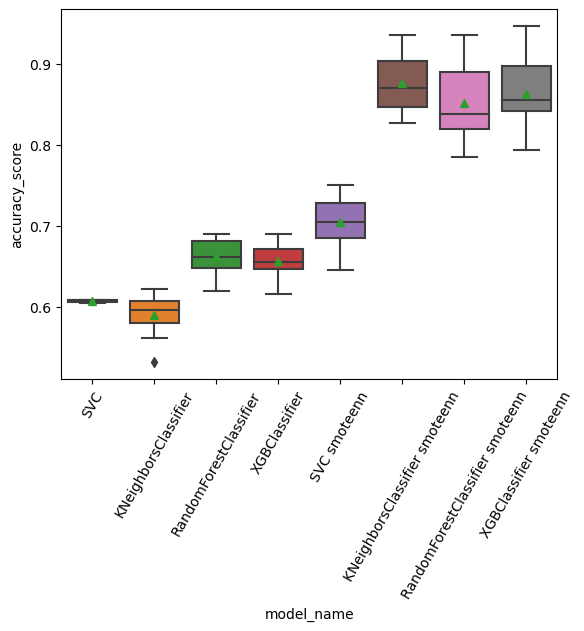

In [64]:
from sklearn.model_selection import StratifiedKFold #for K-fold cross validation
for model in models:
    model_name = f'{model.__class__.__name__} smoteenn'
    kfold = StratifiedKFold(10, shuffle=True, random_state=seed)
    scores = cross_val_score(model, X_smoteenn, y_smoteenn, cv=kfold)
    for fold_idx, score in enumerate(scores):
        entries.append([model_name, fold_idx, score])
cv_df = pd.DataFrame(entries, columns= [ 'model_name','fold id','accuracy_score' ])
sns.boxplot(cv_df,x='model_name',y='accuracy_score',showmeans=True)
plt.xticks(rotation=60)

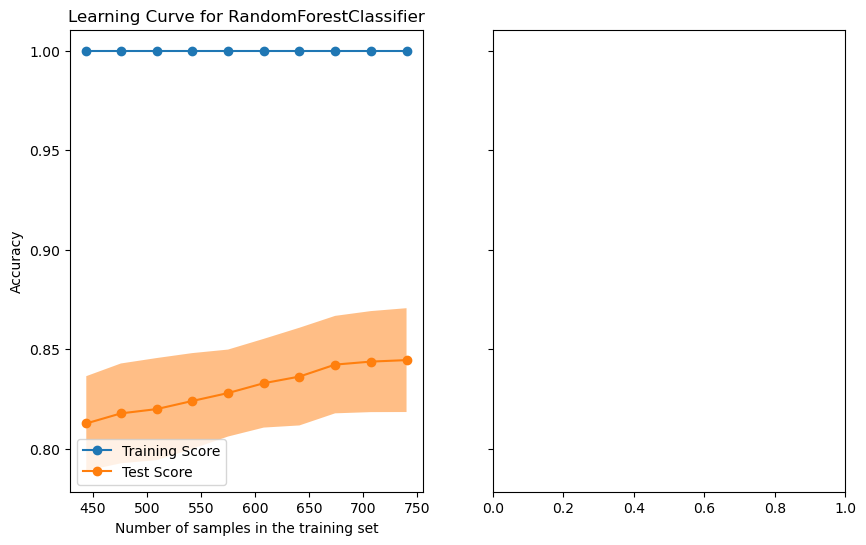

In [65]:
from sklearn.model_selection import LearningCurveDisplay, ShuffleSplit
common_params = {
    "X": X_smoteenn,
    "y":  y_smoteenn,
    "train_sizes": np.linspace(0.6, 1.0, 10),
    "cv": ShuffleSplit(n_splits=50, test_size=0.2, random_state=0),
    "score_type": "both",
    "n_jobs": 4,
    "line_kw": {"marker": "o"},
    "std_display_style": "fill_between",
    "score_name": "Accuracy",
}
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 6), sharey=True)
rf=RandomForestClassifier(random_state=seed)
# xgb=XGBClassifier ( eval_metric='logloss', random_state=seed)   [rf, xgb]
for ax_idx, estimator in enumerate([rf]):
    LearningCurveDisplay.from_estimator(estimator, **common_params, ax=ax[ax_idx])
    handles, label = ax[ax_idx].get_legend_handles_labels()
    ax[ax_idx].legend(handles[:2], ["Training Score", "Test Score"])
    ax[ax_idx].set_title(f"Learning Curve for {estimator.__class__.__name__}")

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


Variable Importance Plot - Global Interpretation


No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


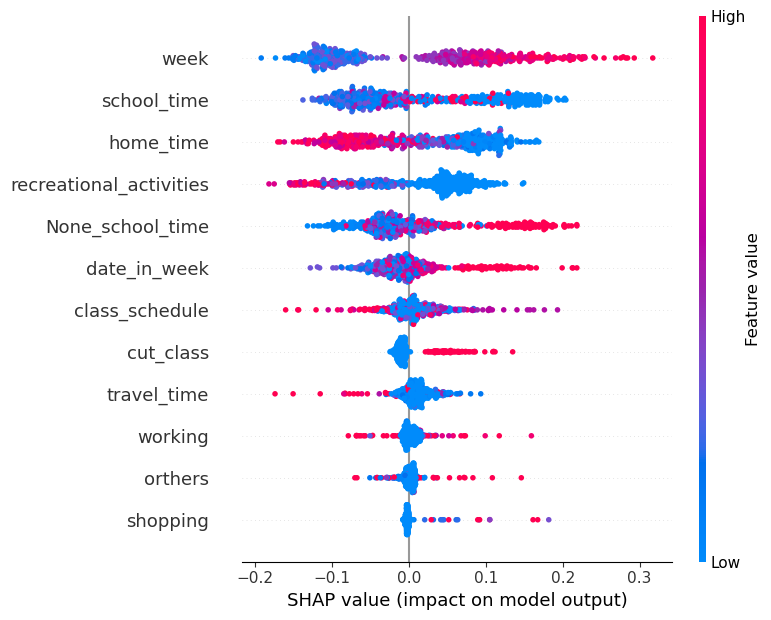

In [66]:
import shap
shap.initjs()

# Create the explainer
explainer1 = shap.TreeExplainer(model_smoteenn)

shap_values = explainer1.shap_values(X_vad)
print("Variable Importance Plot - Global Interpretation")
figure = plt.figure()
shap.summary_plot(shap_values[1], X_vad)

In [67]:
X_vad

,home_time,school_time,travel_time,recreational_activities,orthers,date_in_week,cut_class,class_schedule,shopping,working,week,None_school_time
56,20,1416,0,0,0,4,0,7800,0,0,12,4
194,1160,60,20,0,0,1,0,0,0,0,13,220
2227,900,540,0,0,0,2,0,3900,0,0,20,0
233,0,19,0,0,0,2,0,0,1380,0,13,1421
2119,490,80,940,9,19,5,0,3000,0,0,19,870
...,...,...,...,...,...,...,...,...,...,...,...,...
1128,840,180,0,0,0,1,0,3900,0,0,16,420
1216,1180,200,0,20,0,3,0,3900,0,0,16,60
1916,0,1220,0,0,180,0,0,0,0,0,18,220
841,60,420,0,0,0,1,0,6900,0,0,15,960


No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


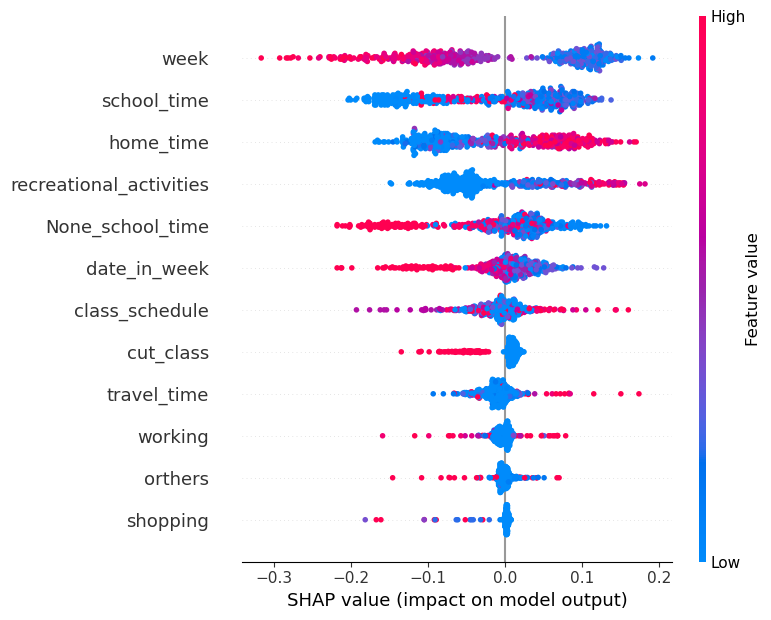

In [68]:
shap.summary_plot(shap_values[0], X_vad)

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


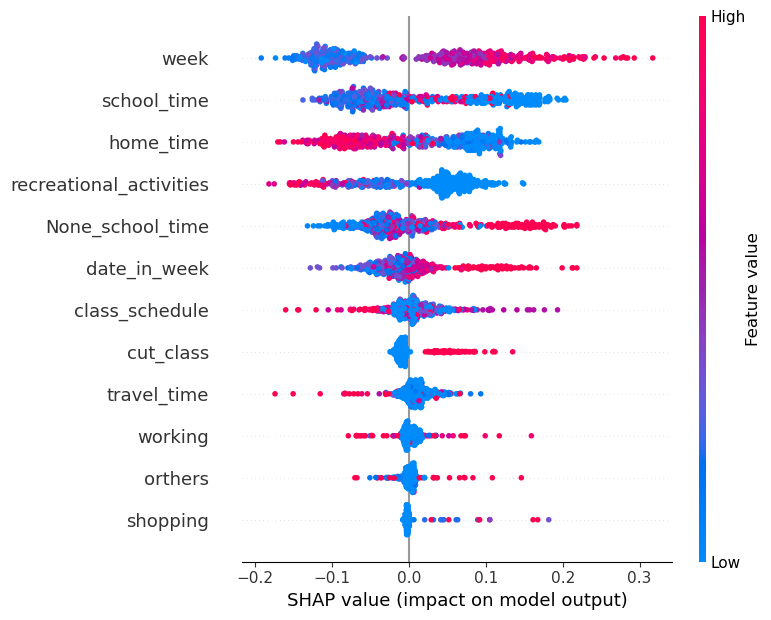

In [69]:
shap.summary_plot(shap_values[1], X_vad)

In [70]:
# shap.summary_plot(shap_values[2], X_vad)

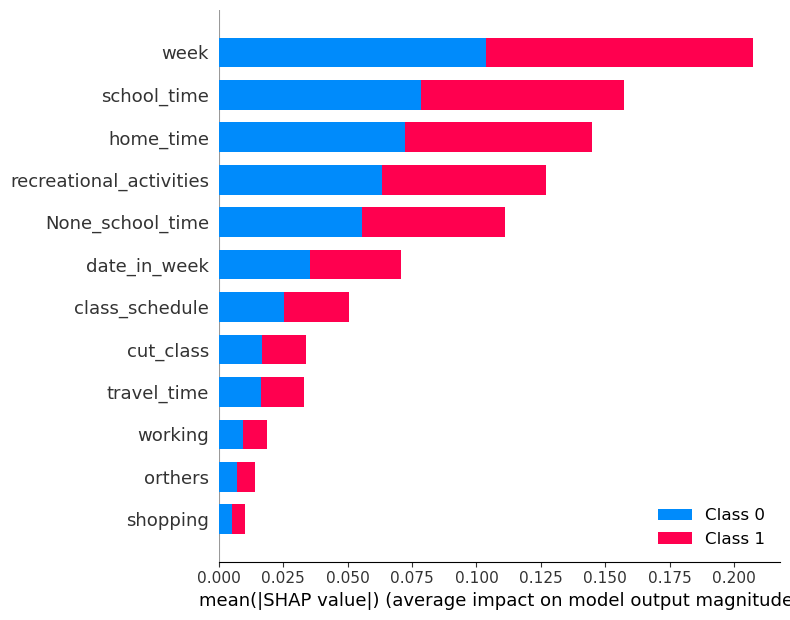

In [71]:
shap.summary_plot(shap_values, X_vad,max_display=30)

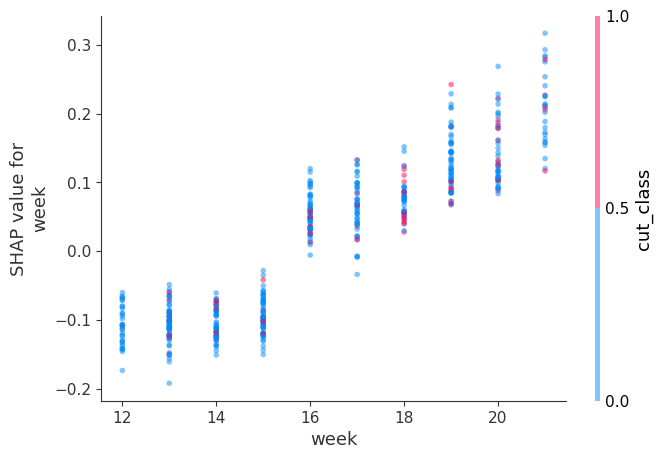

In [72]:
shap. dependence_plot('week', shap_values[1], X_vad, interaction_index="cut_class",alpha=0.5)

In [73]:
explainer = shap.Explainer(model_ada.predict, X_train)

shap_values_explain = explainer(X_vad)

Permutation explainer: 512it [02:22,  3.36it/s]                                   


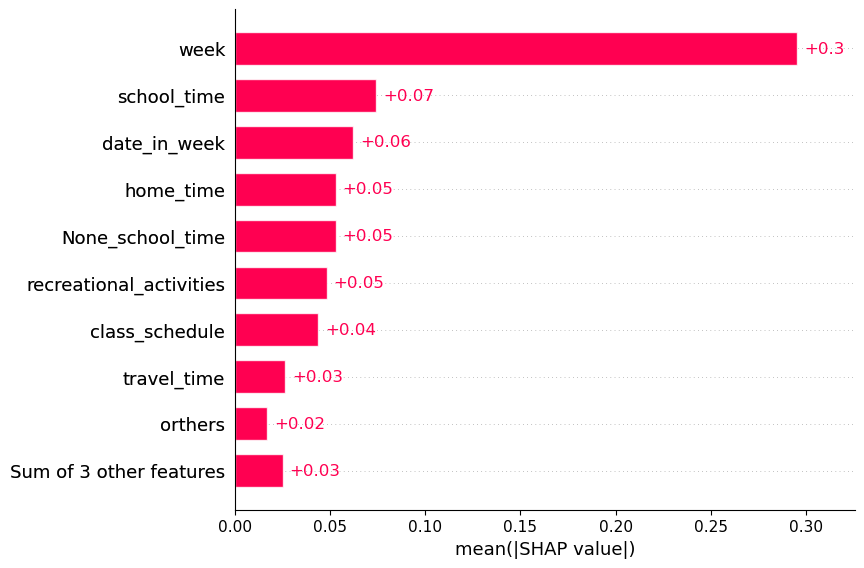

In [74]:
shap.plots.bar(shap_values_explain)

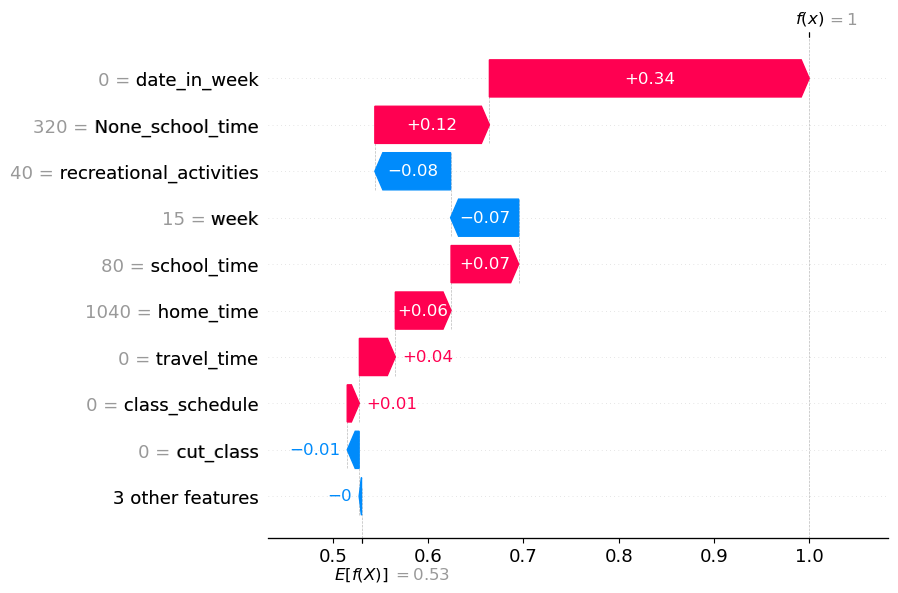

In [75]:
plot=shap.plots.waterfall(shap_values_explain[227])
plot

In [76]:
plot=shap.plots.force(shap_values_explain)
shap.save_html('my_force_plot.html',plot)
plot

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


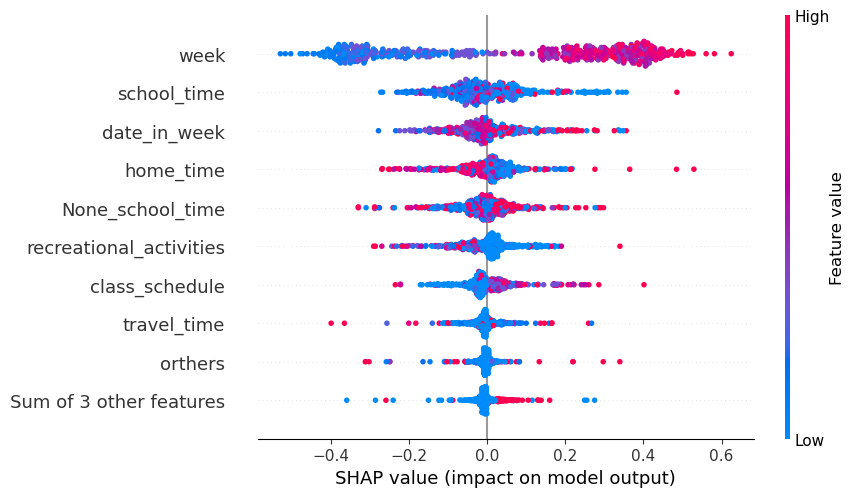

In [77]:
shap.plots.beeswarm(shap_values_explain)

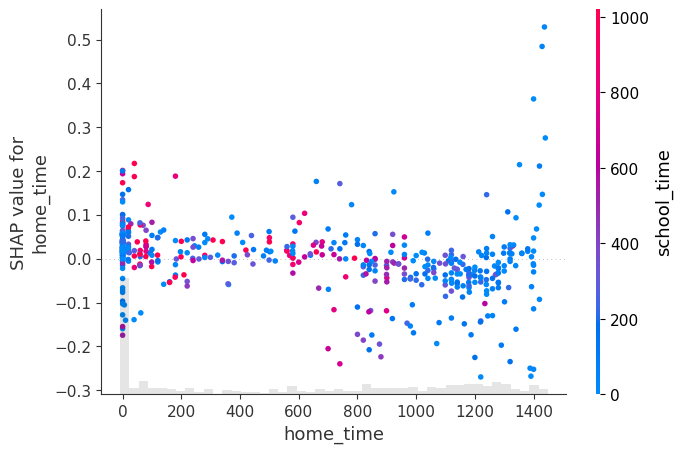

In [78]:
shap.plots.scatter(shap_values_explain[:,"home_time"],
                   color=shap_values_explain[:,"school_time" ])

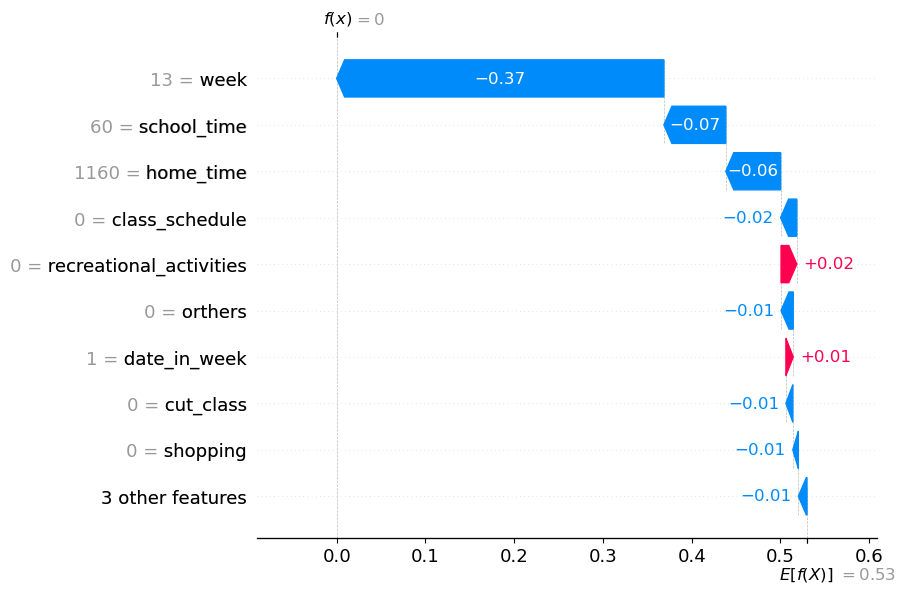

In [79]:
shap.plots.waterfall(shap_values_explain[1])

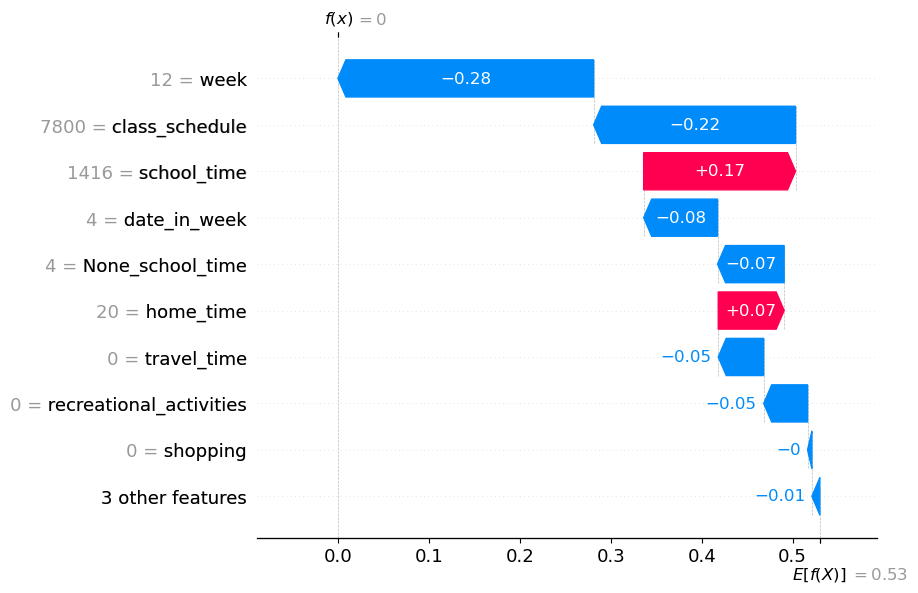

In [80]:
shap.plots.waterfall(shap_values_explain[0])

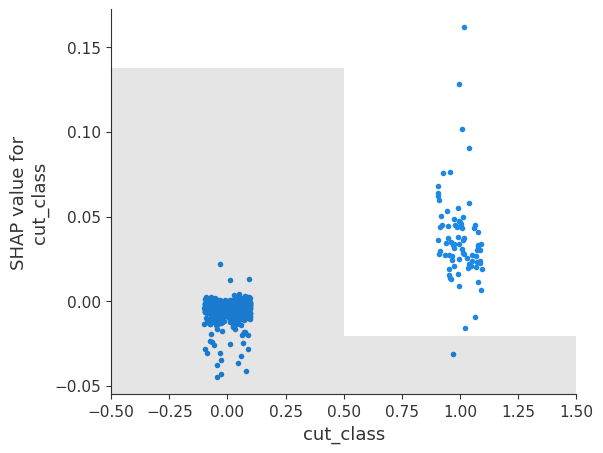

In [81]:
shap.plots.scatter(shap_values_explain[:, "cut_class"])

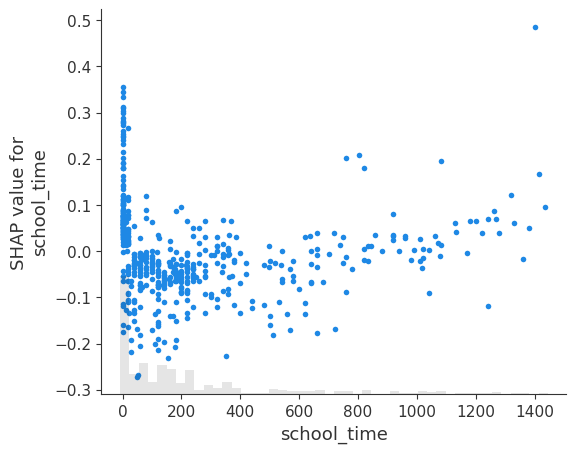

In [82]:
shap.plots.scatter(shap_values_explain[:, "school_time"])

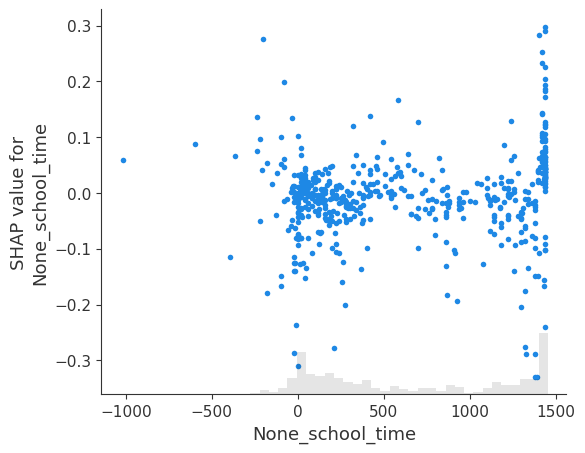

In [83]:
shap.plots.scatter(shap_values_explain[:, "None_school_time"])

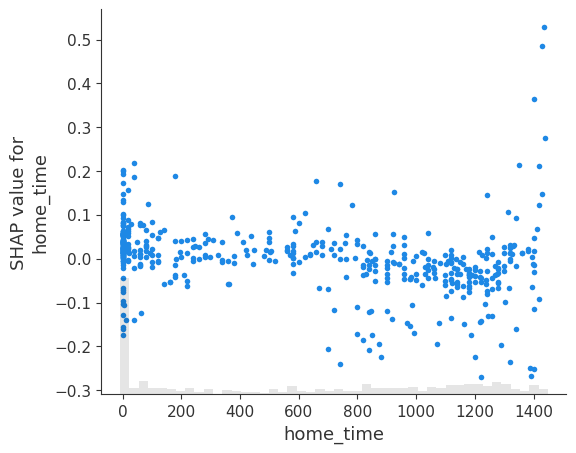

In [84]:
shap.plots.scatter(shap_values_explain[:, "home_time"])

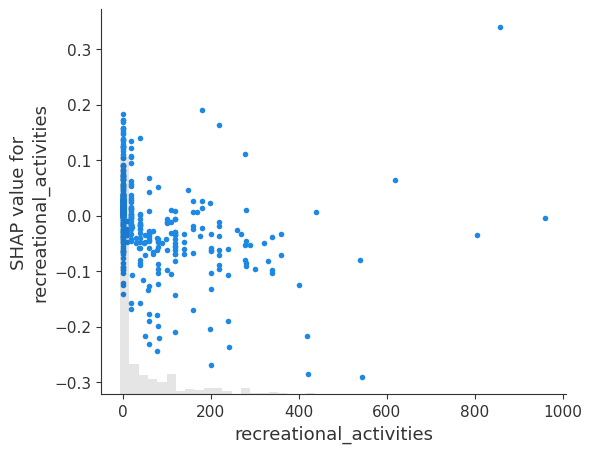

In [85]:
shap.plots.scatter(shap_values_explain[:, "recreational_activities"])

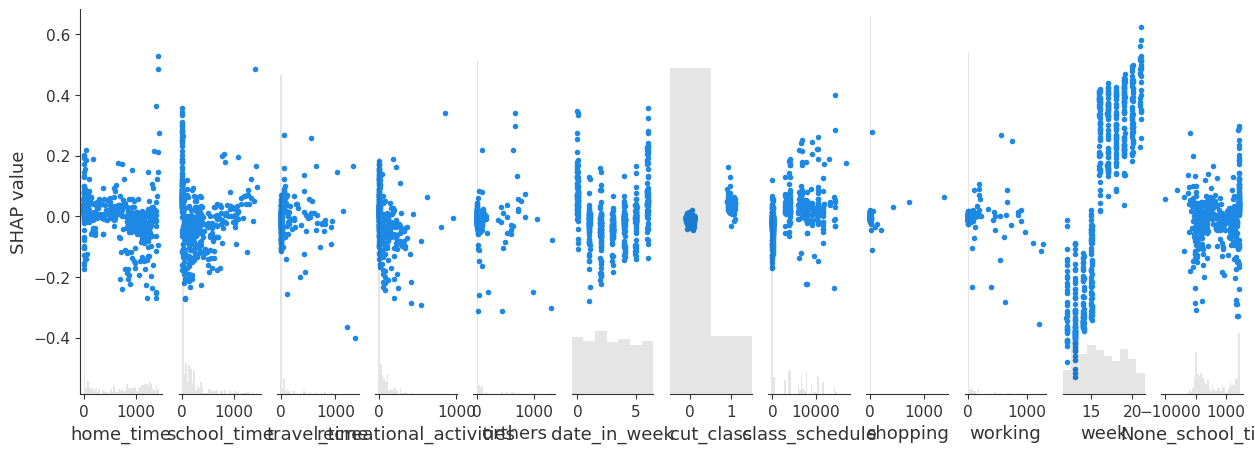

In [86]:
shap.plots.scatter(shap_values_explain)

In [87]:
# model=KNeighborsClassifier(n_neighbors=9)
# model.fit(X_train,y_train)
# prediction1=model.predict(X_vad)
# print('Accuracy for KN is ',metrics.accuracy_score(prediction1,y_vad))
# ax,fig=plt.subplots(figsize=(10,10))
# conf=metrics.confusion_matrix(prediction1,y_vad)
# sns.heatmap(conf,annot=True)

In [88]:
# model=LogisticRegression()
# model.fit(X_train,y_train)
# prediction1=model.predict(X_vad)
# print('Accuracy for LR is ',metrics.accuracy_score(prediction1,y_vad))
# ax,fig=plt.subplots(figsize=(10,10))
# conf=metrics.confusion_matrix(prediction1,y_vad)
# sns.heatmap(conf,annot=True)

In [89]:
# from sklearn import svm #support vector Machine
# model=svm.SVC(kernel='rbf',C=1,gamma=0.1)
# model.fit(X_train,y_train)
# prediction1=model.predict(X_vad)
# print('Accuracy for SVM is ',metrics.accuracy_score(prediction1,y_vad))
# ax,fig=plt.subplots(figsize=(10,10))
# conf=metrics.confusion_matrix(prediction1,y_vad)
# sns.heatmap(conf,annot=True)